In [ ]:
import pandas as pd
import spacy

In [ ]:
!gdown --id 1LzilUSSAEfMZvBK2q7AIHQnYmQJdfQF5 --output chat_messages_cleaned_chat_messages_cleaned.csv
!gdown --id 1oDUkLPYQwgLH6hcA0phnKmMk0L7Xjjok --output sample_team_chats_sample_team_chats.csv
!gdown --id 1ZR5BPuyYCHlo_ZngbcSLDoK0eqpPPAyi --output Lemma_data.xlsx
!gdown --id 1nhGj9_yTvvB2zjwq0h4ydQXgTYfX7yhA --output DesgnIntent1.csv

Downloading...
From: https://drive.google.com/uc?id=1LzilUSSAEfMZvBK2q7AIHQnYmQJdfQF5
To: /content/chat_messages_cleaned_chat_messages_cleaned.csv
100% 1.01M/1.01M [00:00<00:00, 32.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oDUkLPYQwgLH6hcA0phnKmMk0L7Xjjok
To: /content/sample_team_chats_sample_team_chats.csv
100% 113k/113k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZR5BPuyYCHlo_ZngbcSLDoK0eqpPPAyi
To: /content/Lemma_data.xlsx
100% 233k/233k [00:00<00:00, 33.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nhGj9_yTvvB2zjwq0h4ydQXgTYfX7yhA
To: /content/DesgnIntent1.csv
100% 34.2k/34.2k [00:00<00:00, 62.2MB/s]


In [ ]:
orig = pd.read_csv("chat_messages_cleaned_chat_messages_cleaned.csv")
intent = pd.read_csv("sample_team_chats_sample_team_chats.csv")

In [ ]:
orig

Unnamed: 0 participant__session__code  ...  catalog  parameter_db
0              0                   umtzl2qt  ...        0             0
1              1                   umtzl2qt  ...        0             0
2              2                   umtzl2qt  ...        0             0
3              3                   umtzl2qt  ...        0             0
4              4                   umtzl2qt  ...        0             0
...          ...                        ...  ...      ...           ...
7685        7685                   8hwn1gy2  ...        0             0
7686        7686                   8hwn1gy2  ...        0             0
7687        7687                   8hwn1gy2  ...        0             0
7688        7688                   8hwn1gy2  ...        0             0
7689        7689                   8hwn1gy2  ...        0             0

[7690 rows x 13 columns]

In [ ]:
orig['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1554813515
1       1554813548
2       1554813562
3       1554813564
4       1554813575
           ...    
7685    1555014041
7686    1555014046
7687    1555014072
7688    1555014096
7689    1555014116
Name: timestamp, Length: 7690, dtype: int64>

In [ ]:
intent

Unnamed: 0  ...                   Intention
0          3417  ...      Asking parameter value
1          3421  ...  Suggesting parameter value
2          3423  ...             Acknowledgement
3          3425  ...  Suggesting parameter value
4          3428  ...    Understanding dependency
..          ...  ...                         ...
807        2401  ...                         NaN
808        2429  ...                         NaN
809        2432  ...                         NaN
810        2436  ...                         NaN
811        2440  ...                         NaN

[812 rows x 14 columns]

In [ ]:
intent['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1554989809
1      1554989856
2      1554989865
3      1554989876
4      1554989938
          ...    
807    1554826111
808    1554826163
809    1554826174
810    1554826181
811    1554826197
Name: timestamp, Length: 812, dtype: int64>

In [ ]:
intent['Intention'].notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
807    False
808    False
809    False
810    False
811    False
Name: Intention, Length: 812, dtype: bool

In [ ]:
intent['Intention'].notnull().value_counts()

False    425
True     387
Name: Intention, dtype: int64

In [ ]:
intent.value_counts()

Unnamed: 0  participant__session__code  participant__session_id  participant__id_in_session  participant__code  channel                sender_role  body                                                                     timestamp   recipient__code  recipient_role  catalog  parameter_db  Intention                                  
4795        1x32i6ma                    3                        3                           z3dco7z1           3-engine_design-1-1-3  crankshaft   FOS 2.06                                                                 1554999204  yzr1e8du         piston          0        1             Suggesting subsystem objectives information    1
3743        03858kxd                    1                        4                           gvdgbam9           1-engine_design-1-3-4  conrod       same sounds good                                                         1554991170  v9fe9kul         crankshaft      0        0             Acknowledgement                         

In [ ]:
pre = pd.read_excel("Lemma_data.xlsx")

In [ ]:
pre

id                                               body
0        1  ['hi', 'piston', 'my', 'crankshaft', 'depends'...
1        2                                   ['thank', 'you']
2        3  ['how', 'low', 'can', 'you', 'go', 'on', 'the'...
3        4  ['all', 'my', 'factor', 'of', 'safety', 'value...
4        5  ['hi', 'flywheel', 'my', 'crankshaft', 'depend...
...    ...                                                ...
7685  7686                    ['ok', 'no', 'one', 'anything']
7686  7687                     ['increase', 'it', 'to', '50']
7687  7688  ['what', 'about', 'thickness', 'of', 'flywheel...
7688  7689                      ['its', 'at', '12', 'lowest']
7689  7690       ['raise', 'it', 'a', 'little', 'like', '20']

[7690 rows x 2 columns]

In [ ]:
pre = pre.drop(['id'],axis = 1)

In [ ]:
pre

body
0     ['hi', 'piston', 'my', 'crankshaft', 'depends'...
1                                      ['thank', 'you']
2     ['how', 'low', 'can', 'you', 'go', 'on', 'the'...
3     ['all', 'my', 'factor', 'of', 'safety', 'value...
4     ['hi', 'flywheel', 'my', 'crankshaft', 'depend...
...                                                 ...
7685                    ['ok', 'no', 'one', 'anything']
7686                     ['increase', 'it', 'to', '50']
7687  ['what', 'about', 'thickness', 'of', 'flywheel...
7688                      ['its', 'at', '12', 'lowest']
7689       ['raise', 'it', 'a', 'little', 'like', '20']

[7690 rows x 1 columns]

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(pre['body'].values))

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [ ]:
wordcloud.generate(long_string)


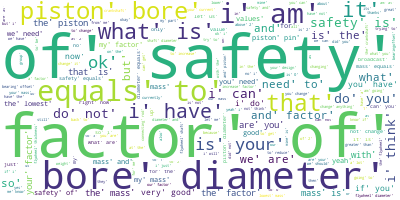

In [ ]:
wordcloud.to_image()

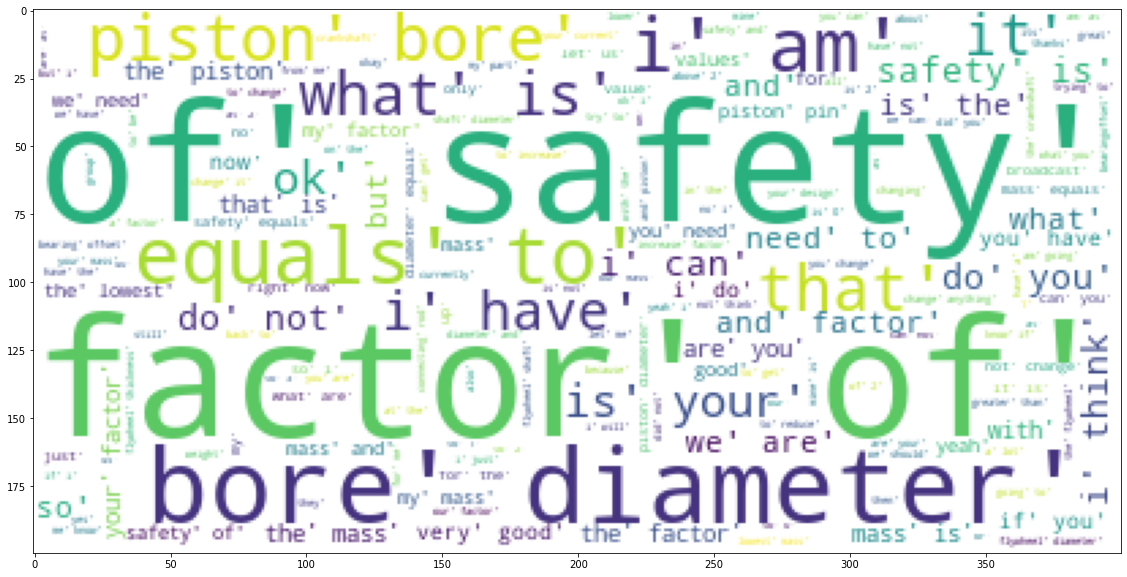

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = pre.body.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['hi', 'piston', 'crankshaft', 'depends', 'bore', 'diameter', 'yet', 'know', 'probably', 'help', 'know']


In [ ]:
data_words

[['hi',
  'piston',
  'crankshaft',
  'depends',
  'bore',
  'diameter',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['thank'],
 ['low', 'go', 'piston', 'bore', 'diameter'],
 ['factor',
  'safety',
  'values',
  'hundreds',
  'suspect',
  'depends',
  'lot',
  'bearingoffset'],
 ['hi',
  'flywheel',
  'crankshaft',
  'depends',
  'flywheel',
  'shaft',
  'diameter',
  'piston',
  'bore',
  'diameter',
  'thickness',
  'flywheel',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['min'],
 ['value', 'works', 'best', 'simulation'],
 ['value', 'bore', 'diameter'],
 ['let', 'play', 'around', 'numbers'],
 ['flywheel',
  'also',
  'depends',
  'crankshaft',
  'bearing',
  'offset',
  'bearingoffset'],
 ['broadcasted', 'recent', 'simulation', 'definitely', 'final', 'one'],
 ['sounds', 'good'],
 ['yes', 'broadcast'],
 ['sounds', 'good', 'tried', 'middle', 'values', 'broadcast'],
 ['thank', 'information'],
 ['hey',
  'conrod',
  'curious',
  'thought',
  'good',
  'piston',
  'd

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.050*"diameter" + 0.047*"mass" + 0.040*"safety" + 0.039*"factor" + '
  '0.032*"equals" + 0.031*"good" + 0.020*"flywheel" + 0.019*"change" + '
  '0.017*"bore" + 0.017*"get"'),
 (1,
  '0.126*"factor" + 0.124*"safety" + 0.064*"mass" + 0.015*"lowest" + '
  '0.014*"diameter" + 0.012*"design" + 0.011*"part" + 0.010*"increase" + '
  '0.010*"current" + 0.009*"equals"'),
 (2,
  '0.067*"piston" + 0.048*"diameter" + 0.037*"need" + 0.036*"bore" + '
  '0.026*"mass" + 0.022*"safety" + 0.022*"factor" + 0.021*"think" + '
  '0.018*"pin" + 0.013*"yeah"'),
 (3,
  '0.045*"ok" + 0.018*"back" + 0.018*"change" + 0.015*"values" + '
  '0.014*"anything" + 0.014*"us" + 0.013*"broadcast" + 0.013*"equals" + '
  '0.012*"crankshaft" + 0.011*"let"')]


In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models
# import pickle 
# import os
# # Visualize the topics
# pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

In [ ]:
#!conda install -c memex pyldavis

In [ ]:
#!python -m pip install -U pyLDAvis

    -- GAN from labels/topics and then new messages
    -- input to generator?

In [ ]:
dtf = pd.read_csv("DesgnIntent1.csv")

In [ ]:
dtf

body                  intent
0    we may reduce D just a hair because of the giv...   Providing information
1      cool, I havent changed anything from excellent    Providing information
2                          ya'' should chat about that   Providing information
3    any FOS higher than 2 gets us nothing more, we...   Providing information
4    sadly no i am at the lowest limit for the pist...   Providing information
..                                                 ...                     ...
495                            we're back to very good   Providing information
496                                  back to very good   Providing information
497                         global is at 2.3 right now   Providing information
498  How does the piston bore diameter affect the o...  Asking for information
499                        i only depend on the piston   Providing information

[500 rows x 2 columns]

In [ ]:
#hi = hi.drop(['id'],axis = 1)

In [ ]:
dtf.columns = ['text','y']

In [ ]:
dtf

text                       y
0    we may reduce D just a hair because of the giv...   Providing information
1      cool, I havent changed anything from excellent    Providing information
2                          ya'' should chat about that   Providing information
3    any FOS higher than 2 gets us nothing more, we...   Providing information
4    sadly no i am at the lowest limit for the pist...   Providing information
..                                                 ...                     ...
495                            we're back to very good   Providing information
496                                  back to very good   Providing information
497                         global is at 2.3 right now   Providing information
498  How does the piston bore diameter affect the o...  Asking for information
499                        i only depend on the piston   Providing information

[500 rows x 2 columns]

In [ ]:
dtf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   y       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_util.py

Downloading...
From: https://drive.google.com/uc?id=1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4
To: /content/nlp_util.py
100% 72.3k/72.3k [00:00<00:00, 25.7MB/s]


In [ ]:
#!pip install -U spacy
#!python -m spacy download en_core_web_lg
#!pip install ner_displacy
from nlp_util import *

In [ ]:
#!pip install shap
#!pip install lime
#!pip install rouge
#!pip install langdetect
#!pip install transformers -i https://pypi.python.org/simple

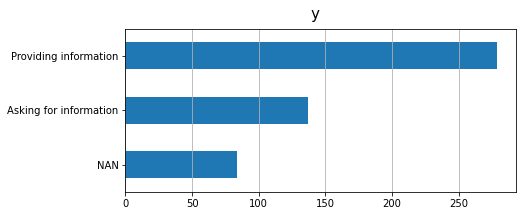

In [ ]:
plot_distributions(dtf, x="y", top=None, figsize=(7,3))


In [ ]:
dtf['y'].value_counts()

Providing information     279
Asking for information    137
NAN                        84
Name: y, dtype: int64

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy import displacy
#import ner_displacy
ner = spacy.load("en_core_web_lg")
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
ner_displacy(dtf["text"].iloc[0], ner, lst_tag_type, title="NER example")

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.


In [ ]:
#!pip install nlp_util

In [ ]:
# example of replacing text and tags extraction
utils_ner_text(dtf["text"].iloc[0], ner, lst_tag_type, grams_join="_")

('we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass',
 [])

In [ ]:
#!pip install rouge

In [ ]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner, lst_tag_type, grams_join="_", create_features=True)
dtf.head()

--- tagging ---
--- counting tags ---
--- creating features ---


text  ... tags_DATE
0  we may reduce D just a hair because of the giv...  ...         0
1    cool, I havent changed anything from excellent   ...         0
2                        ya'' should chat about that  ...         0
3  any FOS higher than 2 gets us nothing more, we...  ...         0
4  sadly no i am at the lowest limit for the pist...  ...         0

[5 rows x 12 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_tagged"].iloc[i])
print("tags:")
dtf["tags"].iloc[i]

we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass  --> 
we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass
tags:


[]

# Providing information:


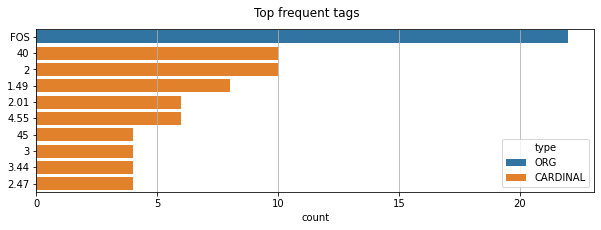

# NAN:


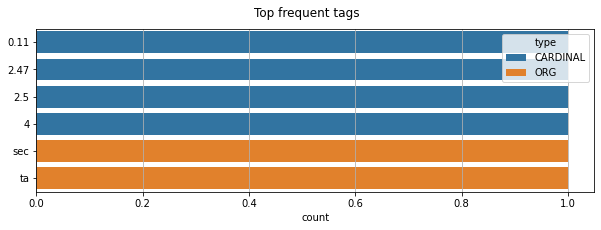

# Asking for information:


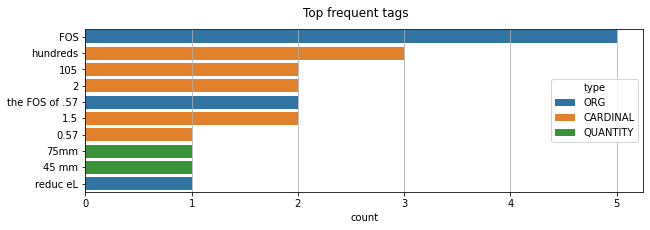

In [ ]:
for y in dtf["y"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=dtf[dtf["y"]==y]["tags"], top=10, figsize=(10,3))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has

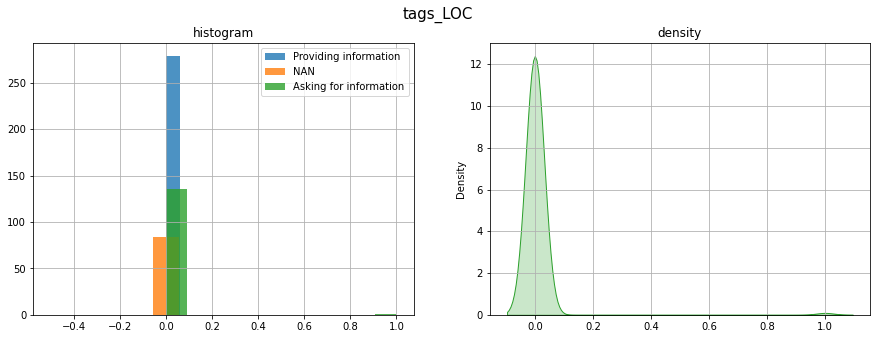

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

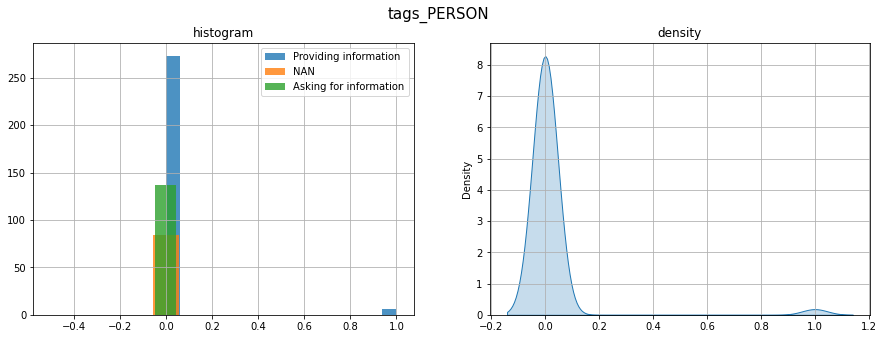

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

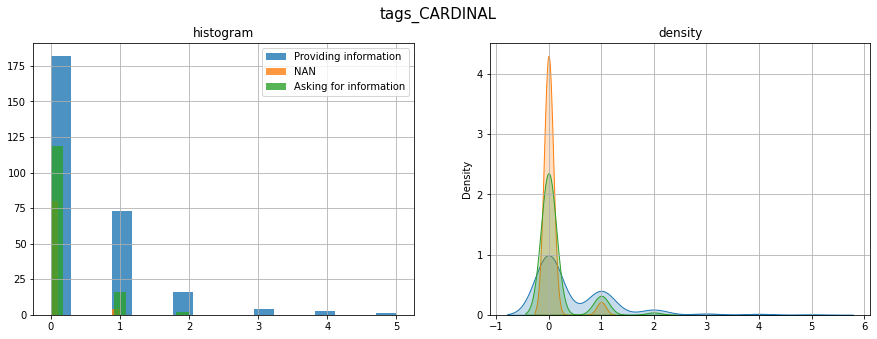

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

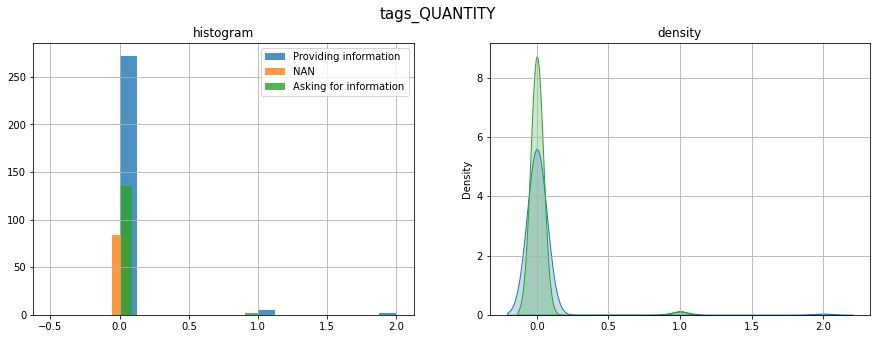

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

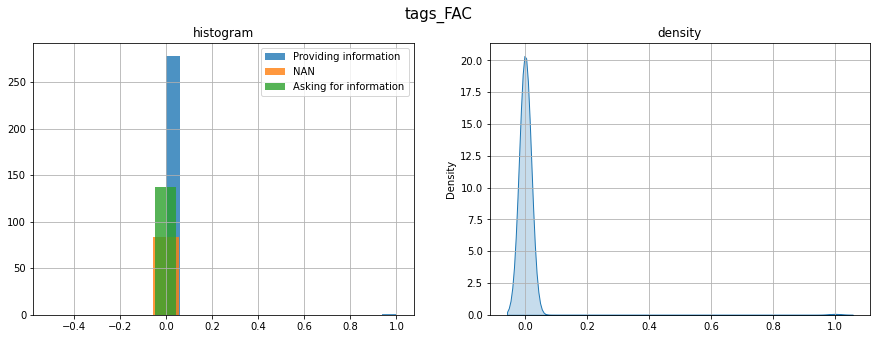

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has

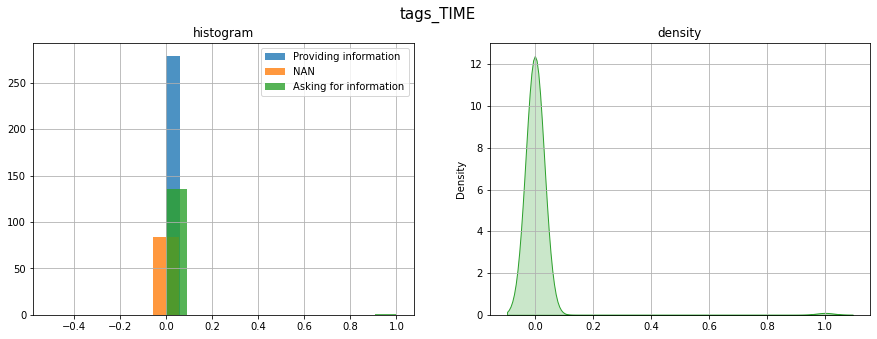

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

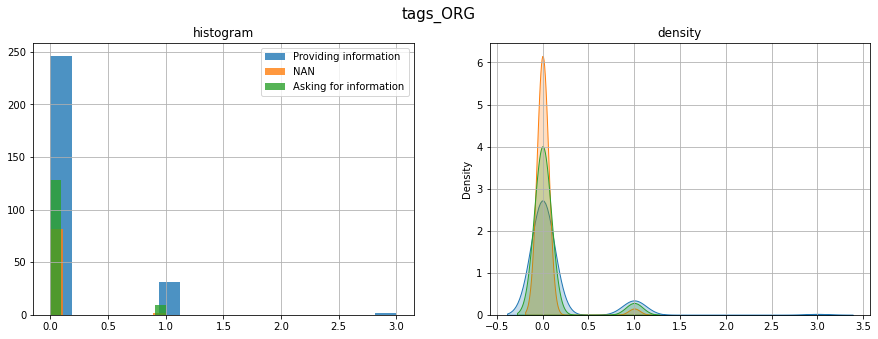

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

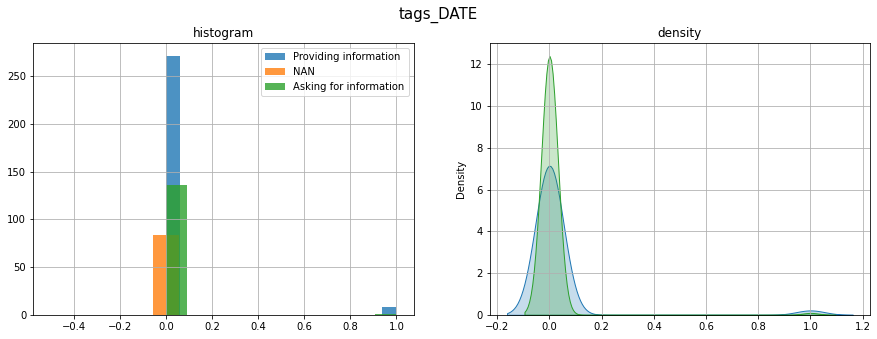

In [ ]:
# tags bivariate distribution
for x in dtf.filter(like="tags_", axis=1).columns:
    plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

In [ ]:
# example
nltk.download('wordnet')
i = 0
print("--- original ---")
print(dtf["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, lst_stopwords=None, stemm=False, lemm=True))

print("--- tokenization ---")
print(dtf["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=True, lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=True))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
--- original ---
we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass
--- cleaning ---
we may reduce d just a hair because of the given ld ratio if it help connecting rod reduce mass
--- tokenization ---
['we', 'may', 'reduce', 'D', 'just', 'a', 'hair', 'because', 'of', 'the', 'given', 'LD', 'ratio', 'if', 'it', 'helps', 'connecting', 'rod', 'reduce', 'mass']
--- remove stopwords ---
may reduce hair given ld ratio helps connecting rod reduce mass
--- stemming ---
may reduc hair given ld ratio help connect rod reduc mass
--- lemmatisation ---
may reduce hair given ld ratio help connecting rod reduce mass


In [ ]:
# create stopwords
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["dtype","say","new","length","object","u","ha","wa"],
                                 lst_keep_words=["new"])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [ ]:
# preprocess text
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, lst_stopwords=lst_stopwords, stemm=False, lemm=True)
dtf.head()

--- found NAs ---
           text text_clean
34         same           
136      me too           
156          so           
182      not me           
223  i have not           


text  ...                                         text_clean
0  we may reduce D just a hair because of the giv...  ...  may reduce D hair given LD ratio help connecti...
1    cool, I havent changed anything from excellent   ...          cool, I havent changed anything excellent
2                        ya'' should chat about that  ...                                          ya'' chat
3  any FOS higher than 2 gets us nothing more, we...  ...      FOS higher 2 get nothing more, need drop mass
4  sadly no i am at the lowest limit for the pist...  ...  sadly lowest limit piston diamter, connecting ...

[5 rows x 13 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_clean"].iloc[i])

we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass  --> 
may reduce D hair given LD ratio help connecting rod reduce mass


In [ ]:
nltk.download('punkt')
dtf = add_text_length(dtf, "text_clean")
dtf.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
                     min       mean    max
char_count           1.0  26.599593  137.0
word_count           1.0   6.367886   29.0
sentence_count       1.0   1.136179    3.0
avg_word_length      1.0   4.279676   12.0
avg_sentence_lenght  1.0   5.633469   22.0


text  ... avg_sentence_lenght
0  we may reduce D just a hair because of the giv...  ...                12.0
1    cool, I havent changed anything from excellent   ...                 7.0
2                        ya'' should chat about that  ...                 3.0
3  any FOS higher than 2 gets us nothing more, we...  ...                10.0
4  sadly no i am at the lowest limit for the pist...  ...                13.0

[5 rows x 18 columns]

In [ ]:
# check
i = 1
print(dtf["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf[col].iloc[i])

cool, I havent changed anything excellent  --> 
word_count: 7
char_count: 36
sentence_count: 1
avg_word_length: 5.142857142857143
avg_sentence_lenght: 7.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

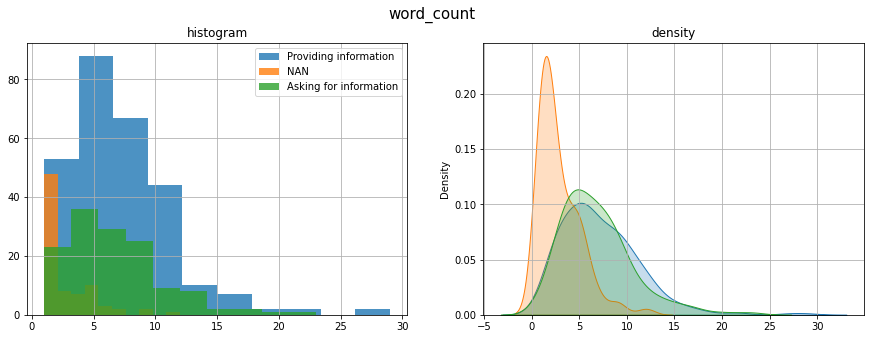

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

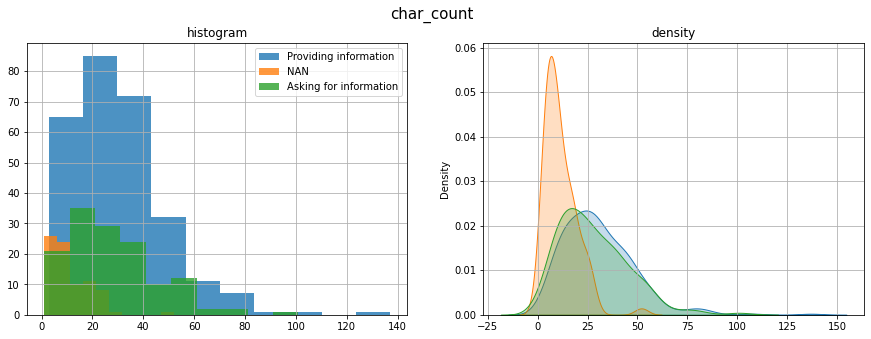

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

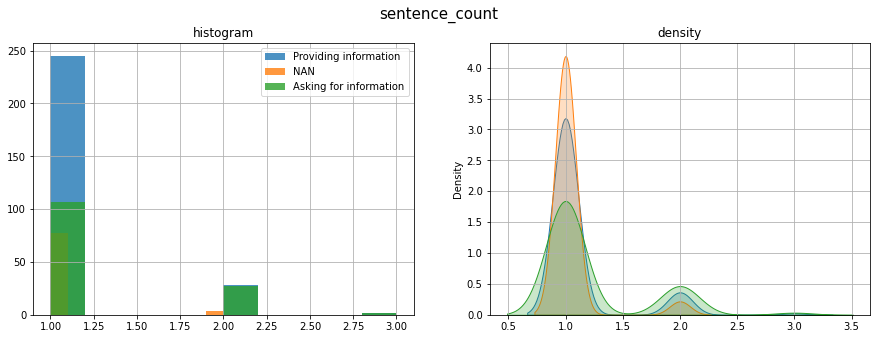

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

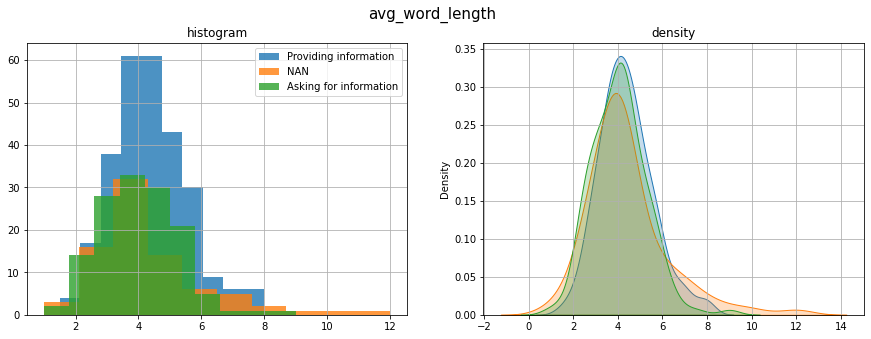

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

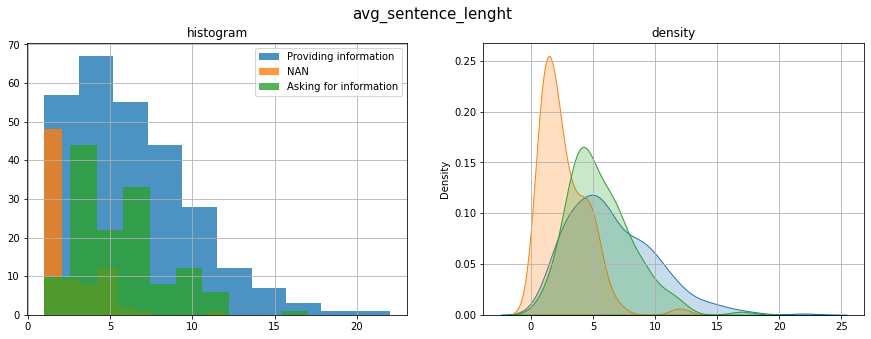

In [ ]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(dtf, x=col, y="y", bins=10, figsize=(15,5))

In [ ]:
#Sentiment Analysis
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf.head()

           count      mean       std  min  25%  50%  75%  max
sentiment  492.0  0.155021  0.303742 -0.7  0.0  0.0  0.3  1.0


text  ... sentiment
0  we may reduce D just a hair because of the giv...  ...     0.000
1    cool, I havent changed anything from excellent   ...     0.675
2                        ya'' should chat about that  ...     0.000
3  any FOS higher than 2 gets us nothing more, we...  ...     0.375
4  sadly no i am at the lowest limit for the pist...  ...    -0.500

[5 rows x 19 columns]

In [ ]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["sentiment"].iloc[i])

we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass  -->  0.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

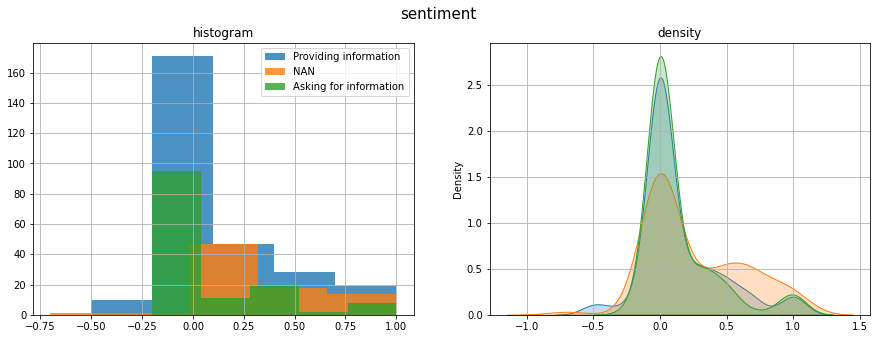

In [ ]:
plot_distributions(dtf, x="sentiment", y="y", bins=5, figsize=(15,5))

In [ ]:
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(0,1))

           count      mean       std  min       25%       50%       75%  max
sentiment  492.0  0.502954  0.178672  0.0  0.411765  0.411765  0.588235  1.0


# Providing information:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


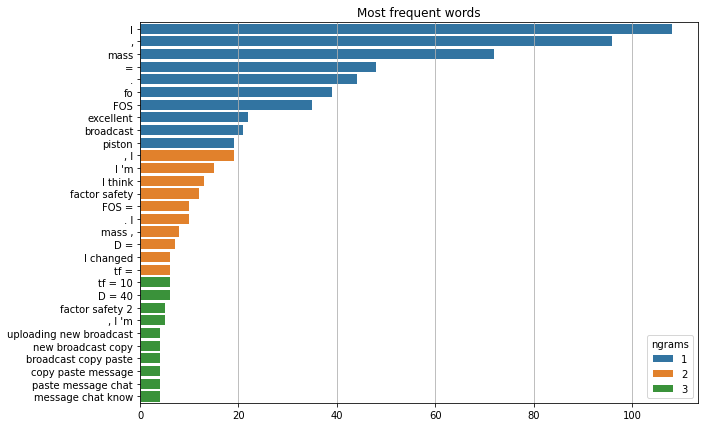

# NAN:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


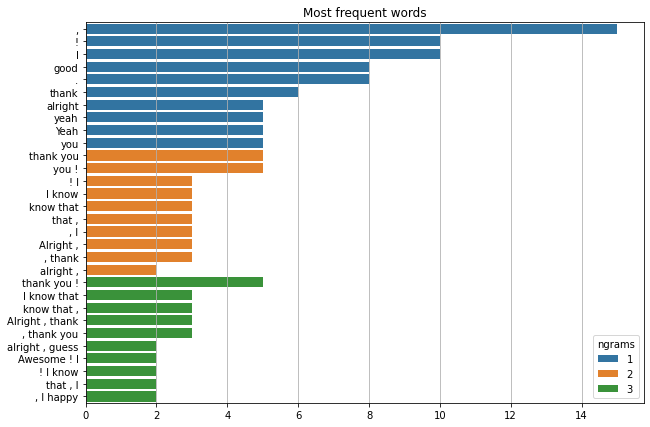

# Asking for information:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


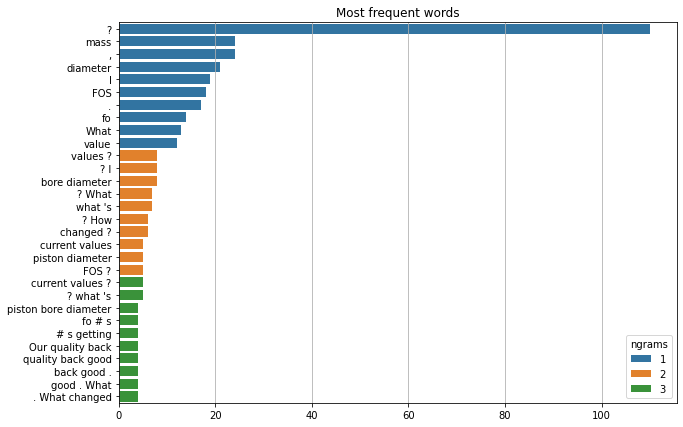

In [ ]:
dtf_freq = pd.DataFrame()
for y in dtf["y"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=dtf[dtf["y"]==y]["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
    dtf_y["y"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [ ]:
# not necessary
dtf, dic_y_mapping = add_encode_variable(dtf, "y")

print(dic_y_mapping)
dtf[["y","y_id"]].sample(5)

{0: 'Asking for information', 1: 'NAN', 2: 'Providing information'}


y  y_id
289  Providing information     2
261                    NAN     1
469  Providing information     2
31   Providing information     2
453  Providing information     2

In [ ]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="y", test_size=0.3, shuffle=False)


X_train shape: (344, 19) | X_test shape: (148, 19)
y:
  Providing information  -->  train: 0.56 | test: 0.57
  Asking for information  -->  train: 0.29 | test: 0.24
  NAN  -->  train: 0.15 | test: 0.19
20 features: ['text', 'text_tagged', 'tags', 'tags_LOC', 'tags_PERSON', 'tags_CARDINAL', 'tags_QUANTITY', 'tags_FAC', 'tags_TIME', 'tags_ORG', 'tags_DATE', 'text_clean', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'sentiment', 'y_id']


In [ ]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

# BOW + ML

In [ ]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=100000, ngram_range=(1,6), lowercase=False)

--- creating sparse matrix ---
shape: (344, 3911)
--- creating vocabulary ---
3911 words
--- tokenization ---
344 texts


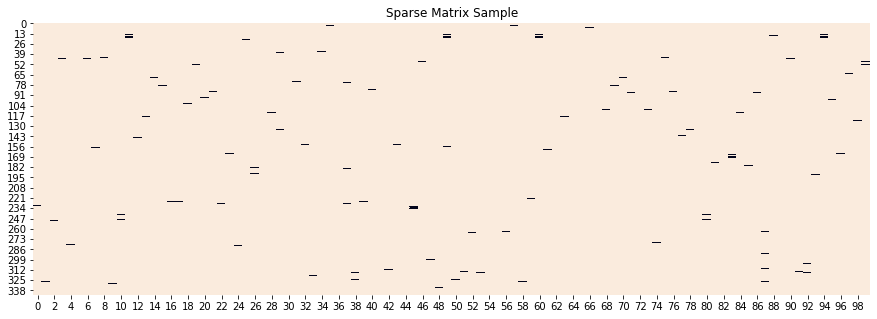

In [ ]:

dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [ ]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'It look like engine design excellent': 500, 'It would': 501, 'It would nice': 502, 'It would nice group': 503, 'It would nice group chat': 504, 'It would nice group chat blindly': 505}

value of these features (in the sparse matrix) for the first text:
['It look like engine design excellent', 'It would', 'It would nice', 'It would nice group', 'It would nice group chat']
[[0. 0. 0. 0. 0.]]


In [ ]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["text_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  may reduce D hair given LD ratio help connecting rod reduce mass | len: 12
to:  [2488, 2968, 1961, 1873, 523, 2918, 1986, 1207, 3033, 2968, 2366] | len: 11
check:  may  -- idx in vocabulary --> 2488
!!! 1 words not in vocabulary: ['D']


In [ ]:
X_names, dtf_selection = features_selection(X_train, dtf_train["y"], X_names, top=None, print_top=10)


features selection: from 3,911 to 30
 
# Asking for information:
  . selected features: 7
  . top features: values, sit, sit now, current values, What, fo getting, current
 
# NAN:
  . selected features: 23
  . top features: thank, thank you, sweet, alright, Alright, you, Alright thank, Alright thank you, alright guess, guess
 
# Providing information:
  . selected features: 0
  . top features: 
 


In [ ]:
dtf_selection.sample(5)


feature     score    y
678   Sounds good  0.957434  NAN
3908          you  0.995327  NAN
2699         okay  0.964069  NAN
677        Sounds  0.957434  NAN
3875         yeah  0.984882  NAN

--- creating sparse matrix ---
shape: (344, 30)
--- used vocabulary ---
30 words
--- tokenization ---
344 texts


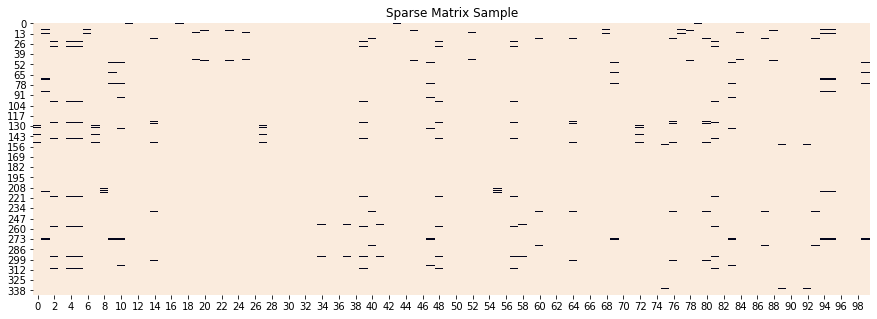

In [ ]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vocabulary=X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [ ]:
# Explore the sparse matrix as dtf
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, X_names, prefix="")

In [ ]:
dtf_X_train = pd.concat([dtf_train[["text","y"]], dtf_X_train.set_index(dtf_train.index)], axis=1)
dtf_X_train.head()

text  ... cool
0  we may reduce D just a hair because of the giv...  ...  0.0
1    cool, I havent changed anything from excellent   ...  1.0
2                        ya'' should chat about that  ...  0.0
3  any FOS higher than 2 gets us nothing more, we...  ...  0.0
4  sadly no i am at the lowest limit for the pist...  ...  0.0

[5 rows x 32 columns]

In [ ]:
#Model Design
classifier = naive_bayes.MultinomialNB()

In [ ]:
# Train/Test

# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = dtf_test["text_clean"].values

In [ ]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_test, vectorizer, classifier)


Accuracy: 0.57
Auc: 0.52
Detail:
                        precision    recall  f1-score   support

Asking for information       0.00      0.00      0.00        36
                   NAN       1.00      0.04      0.07        28
 Providing information       0.57      1.00      0.73        84

              accuracy                           0.57       148
             macro avg       0.52      0.35      0.27       148
          weighted avg       0.51      0.57      0.43       148



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


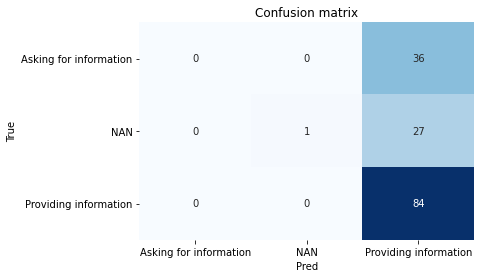

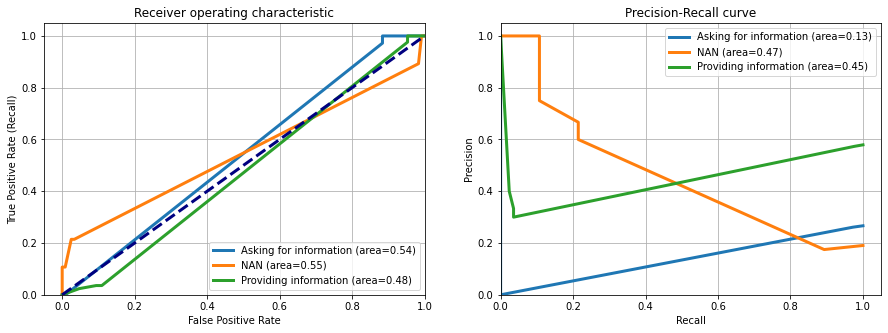

In [ ]:
#Evaluate
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))


In [ ]:
#Explain
i = 17
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),5))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["text"].iloc[i], top=10)
print(dtf_test["text"].iloc[i])

True: Providing information --> Pred: Providing information | Prob: 0.55523
 


i don't think so


##Model Desing & Testing (Embedding + Deep Learning)¶


In [ ]:
!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_util.py
from nlp_util import *

Downloading...
From: https://drive.google.com/uc?id=1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4
To: /content/nlp_util.py
100% 72.3k/72.3k [00:00<00:00, 33.8MB/s]


In [ ]:
# !pip install rouge
# !pip install transformers==3.0.0 
# !pip install sample_data
# !pip install lime

In [ ]:
#!pip install langdetect

In [ ]:
lst_common_terms = ["of","with","without","and","or","the","a"]
#dtf_train = dtf_train.explode('text_clean')
#dtf_train['text_clean'] = dtf_train['text_clean'].astype('category')
lst_ngrams_detectors, dtf_ngrams = create_ngrams_detectors(corpus=dtf_train["text_clean"],
                                                           lst_common_terms=lst_common_terms, 
                                                           min_count=5)

In [ ]:
dtf_ngrams.value_counts()

word       freq                     ngrams
look like  (6, 261.57142857142856)  2         1
dtype: int64

In [ ]:
# fig, ax = plt.subplots()
# print("hehehehehe")
# sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,data=dtf_ngrams['ngrams'])
# ax.set(xlabel=None, ylabel=None, title="Most frequent words")
# ax.grid(axis="x")
# plt.show()

In [ ]:
    # fig, ax = plt.subplots(figsize=figsize)
    # #print("hehehehehe")
    # sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,data=dtf_ngrams.groupby('ngrams')["ngrams","freq","word"].head(top))
    # ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    # ax.grid(axis="x")
    # plt.show()

In [ ]:
# https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb
#     https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
#         https://towardsdatascience.com/text-classification-with-no-model-training-935fe0e42180
#             https://event.asme.org/IDETC-CIE/Program/Student-Hackathon
#                 https://event.asme.org/Events/media/library/resources/idetc-cie/IDETC-2021-Student-Design-Essay-Competition.pdf
#                     https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

In [ ]:
txt = "bore diameter is huge"
lst_ngrams_detectors[1][txt.split()]

['bore', 'diameter', 'is', 'huge']

In [ ]:
dtf_ngrams.sample()


word                     freq  ngrams
0  look like  (6, 261.57142857142856)       2

--- tokenization ---
635 words
--- padding to sequence ---
344 sequences of length 15


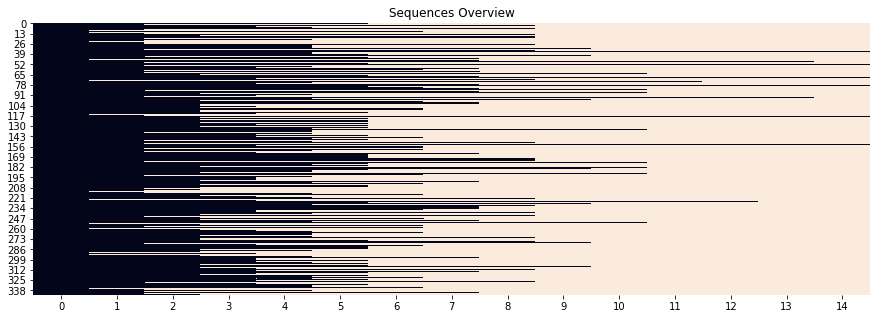

In [ ]:
# create input for lstm (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors, 
                   top=None, oov="NaN", maxlen=15)

X_train, tokenizer, dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [ ]:
# check text conversion
i = 1

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  cool, I havent changed anything excellent | len: 6
to:  [288   2 289  13  25   8   0   0   0   0   0   0   0   0   0] | len: 15
check:  cool,  -- idx in vocabulary --> 288
vocabulary:  {'NaN': 1, 'i': 2, 'mass': 3, 'fo': 4, 'fos': 5} ... (padding element, 0)


--- tokenization ---
--- padding to sequence ---
148 sequences of length 15


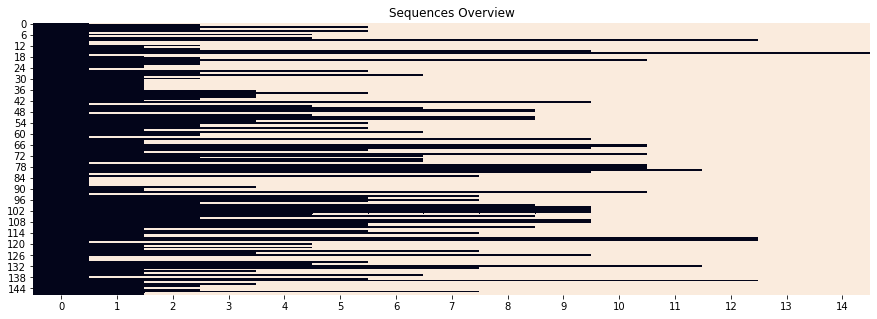

In [ ]:
# Preprocess Test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                  fitted_tokenizer=tokenizer, maxlen=X_train.shape[1])

In [ ]:
# Or train Word2Vec from scratch
avg_len = np.max([len(text.split()) for text in dtf_train["text_clean"]]) /2 

lst_corpus, nlp = fit_w2v(corpus=dtf_train["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                          min_count=1, size=300, window=avg_len, sg=0, epochs=30)

In [ ]:

# check nlp model
word = "bore"
nlp[word].shape

(300,)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


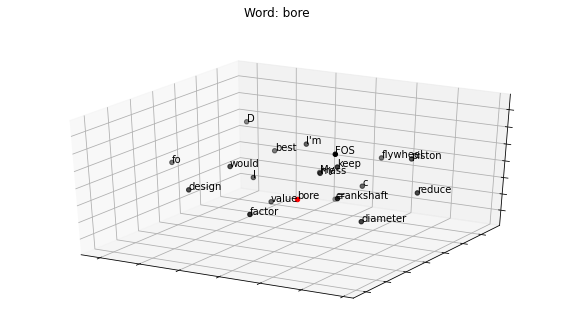

In [ ]:
plot_w2v(lst_words=[word], nlp=nlp, plot_type="3d", top=20, figsize=(10,5))

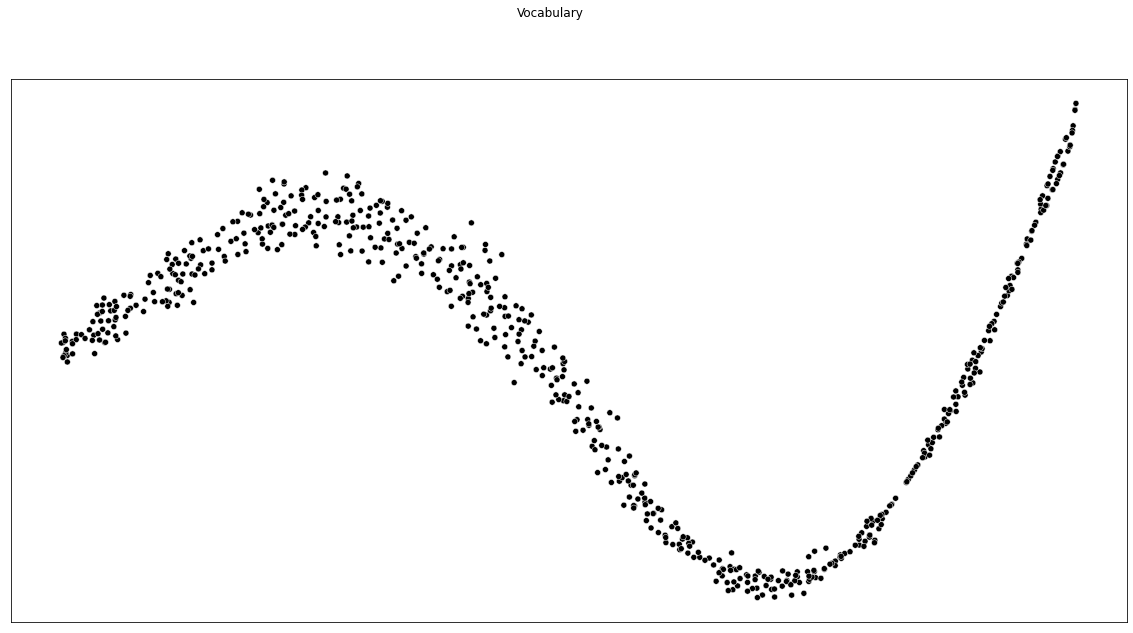

In [ ]:
plot_w2v(lst_words=None, nlp=nlp, plot_type="2d", annotate=False, figsize=(20,10))

### Create Weights

In [ ]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp)


vocabulary mapped to 636 vectors of size 300


In [ ]:
# check
word = dtf_train["text_clean"].iloc[1].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")


word: cool,
dic[word]: 288 |idx
embeddings[idx]: (300,) |vector


In [ ]:

# padding element
print("null vector:", 0)
embeddings[0]

null vector: 0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### model

In [ ]:

def attention_layer(x, neurons):
    Q, K, V = x, x, x
    K = layers.Permute((2,1))(K)
    QxK = layers.Dense(neurons, activation="softmax")(K)
    QxK = layers.Permute((2,1), name="attention")(QxK)
    x = layers.multiply([V, QxK])
    return x

In [ ]:
# Embedding network with Bi-LSTM and Attention layers (for attention explainer)

x_in = layers.Input(shape=(X_train.shape[1],))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1], weights=[embeddings],
                     input_length=X_train.shape[1], trainable=False)(x_in)
## attention
#x = attention_layer(x, neurons=X_train.shape[1])  #<-- tensorflow 1 (manual function)
x = layers.Attention()([x,x])                      #<-- tensorflow 2 (included in keras)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 300)      190800      input_1[0][0]                    
__________________________________________________________________________________________________
attention (Attention)           (None, 15, 300)      0           embedding[0][0]                  
                                                                 embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 15, 30)       37920       attention[0][0]              

{0: 'Asking for information', 1: 'NAN', 2: 'Providing information'}


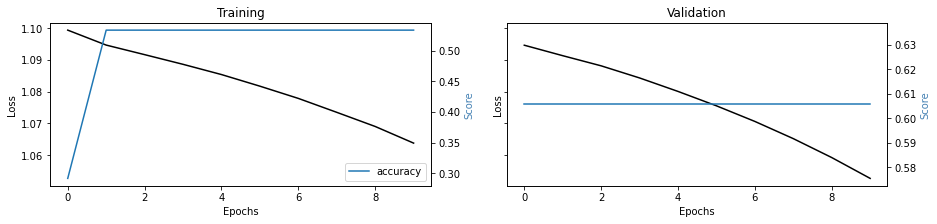

In [ ]:
# this takes a while
model, predicted_prob, predicted = fit_dl_classif(X_train, y_train, X_test, encode_y=True, 
                                                  model=model, epochs=10, batch_size=256)

Accuracy: 0.57
Auc: 0.72
Detail:
                        precision    recall  f1-score   support

Asking for information       0.00      0.00      0.00        36
                   NAN       0.00      0.00      0.00        28
 Providing information       0.57      1.00      0.72        84

              accuracy                           0.57       148
             macro avg       0.19      0.33      0.24       148
          weighted avg       0.32      0.57      0.41       148



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


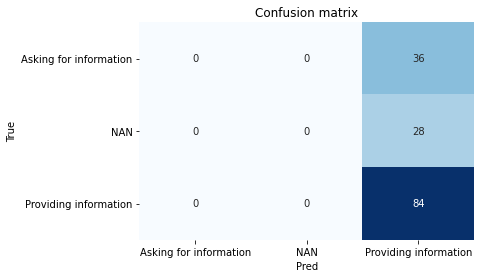

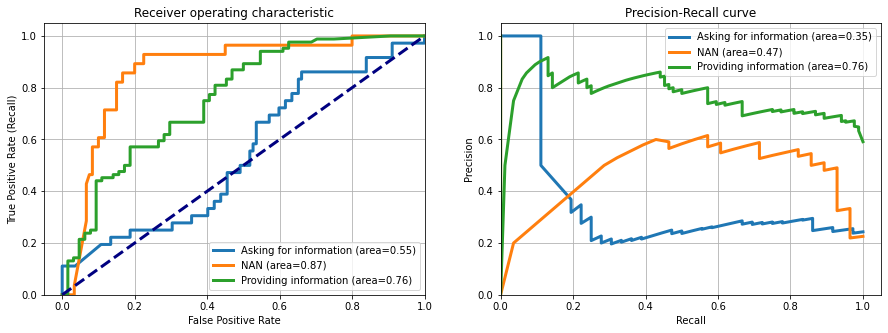

In [ ]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))


True: Providing information --> Pred: Providing information | Prob: 0.36
 


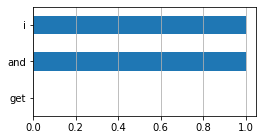

Text with highlighted words


In [ ]:
i = 2
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
text_exp = explainer_attention(model, tokenizer, dtf_test["text"].iloc[i], lst_ngrams_detectors, top=3, figsize=(4,2))

print("\033[1m"+"Text with highlighted words")
from IPython.core.display import display, HTML
display(HTML(text_exp))

## Model Desing & Testing (Language model + Transfer Learning)¶


In [ ]:
# Load pre-trained BERT tokenizer (use a lighter veriosn: distil-BERT)
# tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
# nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# lst_vocabulary = list(tokenizer.vocab.keys())

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Load pre-trained BERT tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# check nlp model
txt = "piston diameter"
X = embedding_bert(txt, tokenizer, nlp, log=True)
print("shape:", X.shape)
print("mean:", np.mean(X[1]))



tokens: ['[CLS]', 'piston', 'diameter', '[SEP]']
ids   : [101, 16733, 6705, 102]
shape: (2, 768)
mean: -0.012614909


In [ ]:
dtf_train['text'].isnull().values.any()

False

In [ ]:
#dtf_trains = dtf_train.dropna()
X_train = tokenize_bert(corpus=dtf_train["text"], tokenizer=tokenizer, maxlen=50)


maxlen: 50
created tensor idx-masks-segments: 3x (344, 52)


In [ ]:
# check feature creation
i = 0

print("txt: ", dtf_train["text"].iloc[0])
print("tokenized:", [tokenizer.convert_ids_to_tokens(idx) for idx in X_train[0][i].tolist()])
print("idx: ", X_train[0][i])
print("mask: ", X_train[1][i])
print("segment: ", X_train[2][i])

txt:  we may reduce D just a hair because of the given LD ratio if it helps connecting rod reduce mass
tokenized: ['[CLS]', '[CLS]', 'we', 'may', 'reduce', 'd', 'just', 'a', 'hair', 'because', 'of', 'the', 'given', 'ld', 'ratio', 'if', 'it', '[SEP]', '[UNK]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[SEP]']
idx:  [  101   101  2057  2089  5547  1040  2074  1037  2606  2138  1997  1996
  2445 25510  6463  2065  2009   102   100     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   102]
mask:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
segment: 

In [ ]:
X_test = tokenize_bert(corpus=dtf_test["text"], tokenizer=tokenizer, maxlen=50)

maxlen: 50
created tensor idx-masks-segments: 3x (148, 52)


In [ ]:
#!pip install transformers==3.0.0

In [ ]:

# # inputs
# idx = layers.Input((52), dtype="int32", name="input_idx")
# masks = layers.Input((52), dtype="int32", name="input_masks")
# segments = layers.Input((52), dtype="int32", name="input_segments")
# # pre-trained bert
# bert = transformers.TFBertModel.from_pretrained("bert-base-uncased")
# bert_out, _ = bert([idx, masks, segments])
# # fine-tuning
# x = layers.GlobalAveragePooling1D()(bert_out)
# x = layers.Dense(64, activation="relu")(x)
# y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
# # compile
# model = models.Model([idx, masks, segments], y_out)
# for layer in model.layers[:7]:
#    layer.trainable = False
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

## inputs
idx = layers.Input((X_train[0].shape[1]-2), dtype="int32", name="input_idx")
masks = layers.Input((X_train[1].shape[1]), dtype="int32", name="input_masks")
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
bert_out = nlp(idx, attention_mask=masks)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(len(np.unique(y_train)), activation='softmax')(x)
## compile
model = models.Model(inputs=[idx, masks], outputs=y_out)
for layer in model.layers[:4]:
    layer.trainable = False
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
X_train[0].shape

(344, 52)

In [ ]:
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array( [inverse_dic[y] for y in y_train] )

In [ ]:
inp = X_train[0][:,:-2]

In [ ]:
#!gdown --id 1-ZzV5wEmiRmCih6Zmfw2925PfBrZXaE4 --output nlp_utilm.py
#from nlp_utilm import *
training = model.fit(x=(inp,X_train[1]), 
                     y=y_train, batch_size=64, epochs=1, shuffle=True, verbose=0, validation_split=0.3)
# model, predicted_prob, predicted = fit_bert_classif((X_train[0],X_train[1]), 
#                                                     y_train, 
#                                                     X_test, 
#                                                     encode_y=True, 
#                                                     model=model, 
#                                                     epochs=1, 
#                                                     batch_size=64)

In [ ]:
ins = (X_test[0][:,:-2],X_test[1])

In [ ]:
predicted_prob = model.predict(ins)

In [ ]:
predicted_prob

array([[0.33759838, 0.2868549 , 0.37554675],
       [0.354616  , 0.28272492, 0.3626591 ],
       [0.29224724, 0.20975395, 0.4979989 ],
       [0.34292945, 0.21583277, 0.44123778],
       [0.3254726 , 0.20848769, 0.4660397 ],
       [0.27122194, 0.2676689 , 0.46110913],
       [0.3246967 , 0.27923802, 0.39606524],
       [0.26441646, 0.30423793, 0.43134564],
       [0.3246967 , 0.27923802, 0.39606524],
       [0.2952301 , 0.22066513, 0.48410475],
       [0.32076976, 0.34206513, 0.33716515],
       [0.22644562, 0.31201   , 0.46154442],
       [0.34484997, 0.21700887, 0.43814117],
       [0.29706052, 0.34225056, 0.36068895],
       [0.35958785, 0.23590665, 0.4045055 ],
       [0.2695298 , 0.24602836, 0.48444188],
       [0.35245207, 0.17750177, 0.47004613],
       [0.27623388, 0.2903178 , 0.43344837],
       [0.29259413, 0.18229115, 0.5251147 ],
       [0.32482028, 0.31396976, 0.36121   ],
       [0.33874768, 0.2076404 , 0.45361188],
       [0.30077463, 0.2442471 , 0.45497832],
       [0.

In [ ]:
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

In [ ]:
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print(metrics.classification_report(y_test.astype(str), np.array(predicted).astype(str)))

Accuracy: 0.62
Auc: 0.69
                        precision    recall  f1-score   support

Asking for information       0.75      0.08      0.15        36
                   NAN       1.00      0.21      0.35        28
 Providing information       0.60      0.99      0.75        84

              accuracy                           0.62       148
             macro avg       0.78      0.43      0.42       148
          weighted avg       0.71      0.62      0.53       148



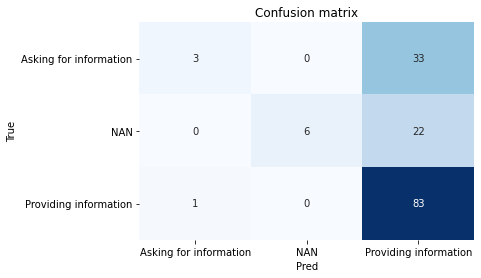

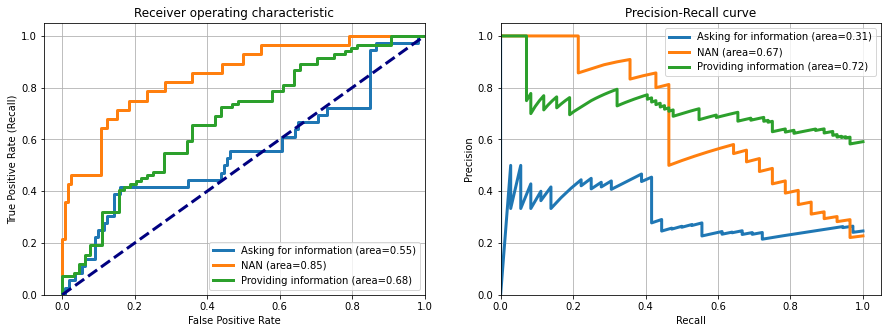

In [ ]:
import numpy as np
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
cm = metrics.confusion_matrix(y_test.astype(str), np.array(predicted).astype(str))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
    ## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

#### Model Desing & Testing (Clustering by Similarity)


In [ ]:
# Load pre-trained W2V
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
dtf_selection.sample(3)

feature     score                       y
3202  sit now  0.985257  Asking for information
198   Alright  0.997125                     NAN
215   Awesome  0.989024                     NAN

In [ ]:
dic_clusters = {}
#print(np.unique(y_train))
for y in np.unique(dtf_train["y"]):
  dic_clusters[y] = [word for word in dtf_selection[dtf_selection["y"]==y]["feature"].tolist() if nlp.vocab.get(word)]
#print(dic_clusters)

for k,v in dic_clusters.items():
  print(k, ": ", v[0:5], "...", len(v))

Asking for information :  ['values', 'sit', 'current'] ... 3
NAN :  ['thank', 'sweet', 'alright', 'you', 'guess'] ... 12
Providing information :  [] ... 0


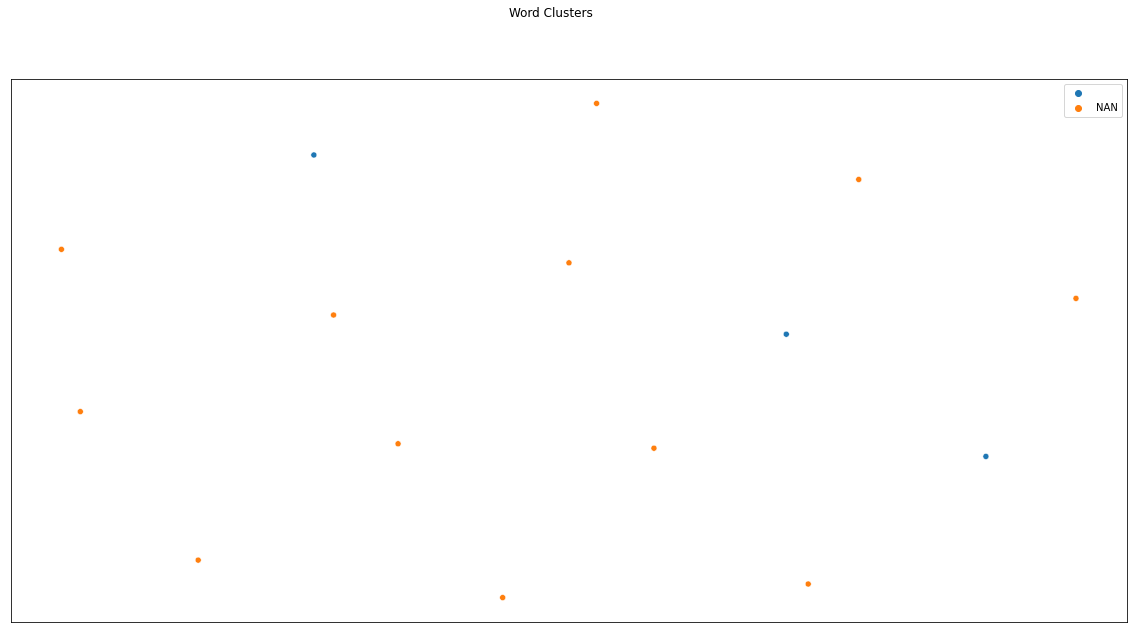

In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=False, figsize=(20,10))


# Providing information:
--- training ---


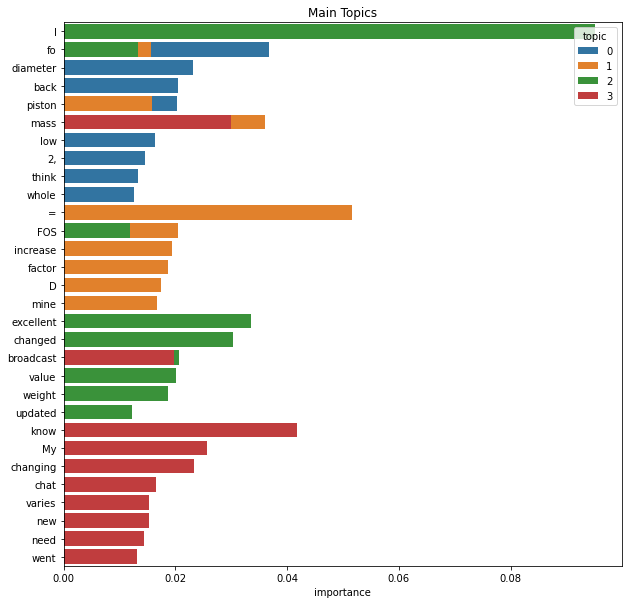

 
# NAN:
--- training ---


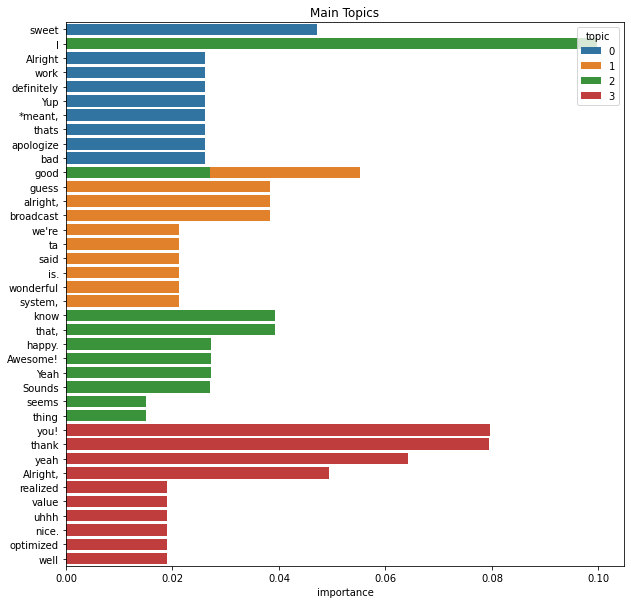

 
# Asking for information:
--- training ---


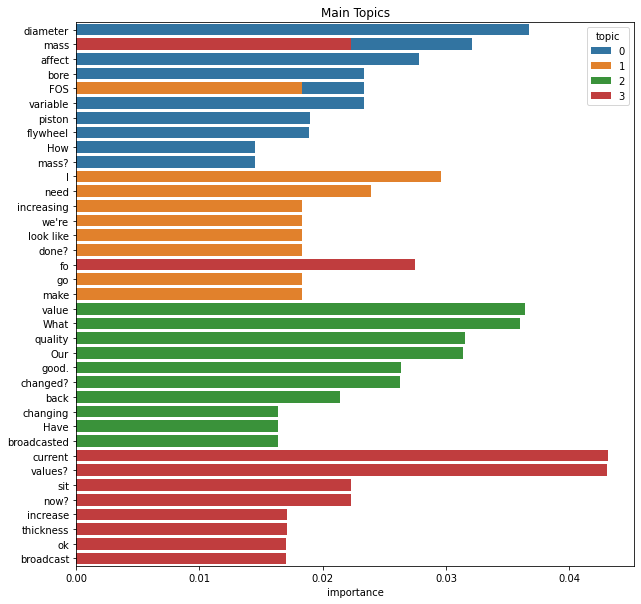

In [ ]:
# Strategy 2) LDA for topic modeling
dtf_topics = pd.DataFrame()
for y in dtf_train["y"].unique():
    print("# {}:".format(y))
    lda, dtf_y = fit_lda(corpus=dtf_train[dtf_train["y"]==y]["text_clean"], n_topics=4, 
                         lst_ngrams_detectors=lst_ngrams_detectors, figsize=(10,10))
    dtf_y["y"] = y
    dtf_topics = dtf_topics.append(dtf_y)
    print(" ")

In [ ]:
dtf_topics.sample(5)


topic   id   word    weight                       y
7       0   30  thats  0.026183                     NAN
36      3   53   uhhh  0.019010                     NAN
3       0   31   bore  0.023387  Asking for information
24      2  164  good.  0.026315  Asking for information
21      2   44   know  0.039250                     NAN

In [ ]:
dic_clusters = {y:dtf_topics[dtf_topics["y"]==y]["word"].values.tolist() for y in dtf_topics["y"].unique()}

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

Providing information :  ['I', 'fo', 'diameter', 'back', 'piston'] ... 40
NAN :  ['sweet', 'I', 'Alright', 'work', 'definitely'] ... 40
Asking for information :  ['diameter', 'mass', 'affect', 'bore', 'FOS'] ... 40


In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="3d", annotate=True, figsize=(20,10))


--- got error ---
"word 'I' not in vocabulary"
maybe you are looking for ... 
[]


<Figure size 1440x720 with 0 Axes>

In [ ]:
nlp.most_similar(["shaft"], topn=3)


[('shafts', 0.7714196443557739),
 ('propeller', 0.5496650338172913),
 ('vertical', 0.5034777522087097)]

In [ ]:
# dic_clusters = {}
# dic_clusters["NAN"] = get_similar_words(['value', 'alright', 'thank', 'working', 'engineer'], top=25, nlp=nlp)
# dic_clusters["Exploration of design parameter values"] = get_similar_words(['check', 'mass', 'try', 'value', 'trim'], top=40, nlp=nlp)
# dic_clusters["Effects of design parameters on objectives"] = get_similar_words(['mass', 'increase', 'seems', 'safety', 'reduce'], top=40, nlp=nlp)
# dic_clusters["Dependencies between design parameters"] = get_similar_words(['diameter', 'variable', 'shaft', 'affect', 'does'], top=40, nlp=nlp)
# dic_clusters["Selected design parameter values for objective(s)"] = get_similar_words(['best', 'final', 'design', 'yes', 'requirement'], top=40, nlp=nlp)
# dic_clusters["Monitoring objective values"] = get_similar_words(['monitor', 'factor', 'evaluate', 'mass', 'still'], top=40, nlp=nlp)
# dic_clusters["Tradeoff between objectives"] = get_similar_words(['factor', 'settle', 'mass', 'need', 'adjust'], top=40, nlp=nlp)

# for k,v in dic_clusters.items():
#     print(k, ": ", v[0:5], "...", len(v))

In [ ]:
dic_clusters = {}
dic_clusters["NAN"] = get_similar_words(['value', 'alright', 'thank', 'working', 'engineer'], top=20, nlp=nlp)
dic_clusters["Asking for information"] = get_similar_words(['check', 'broadcast', 'choose', 'what', 'how'], top=40, nlp=nlp)
dic_clusters["Providing Information"] = get_similar_words(['change', 'check', 'values', 'parameters', 'reduce'], top=25, nlp=nlp)

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

NAN :  ['i', 'good', 'thank', 'work', 'going'] ... 25
Asking for information :  ['would', 'it', 'say', 'want', 'something'] ... 45
Providing Information :  ['require', 'increases', 'values', 'should', 'required'] ... 30


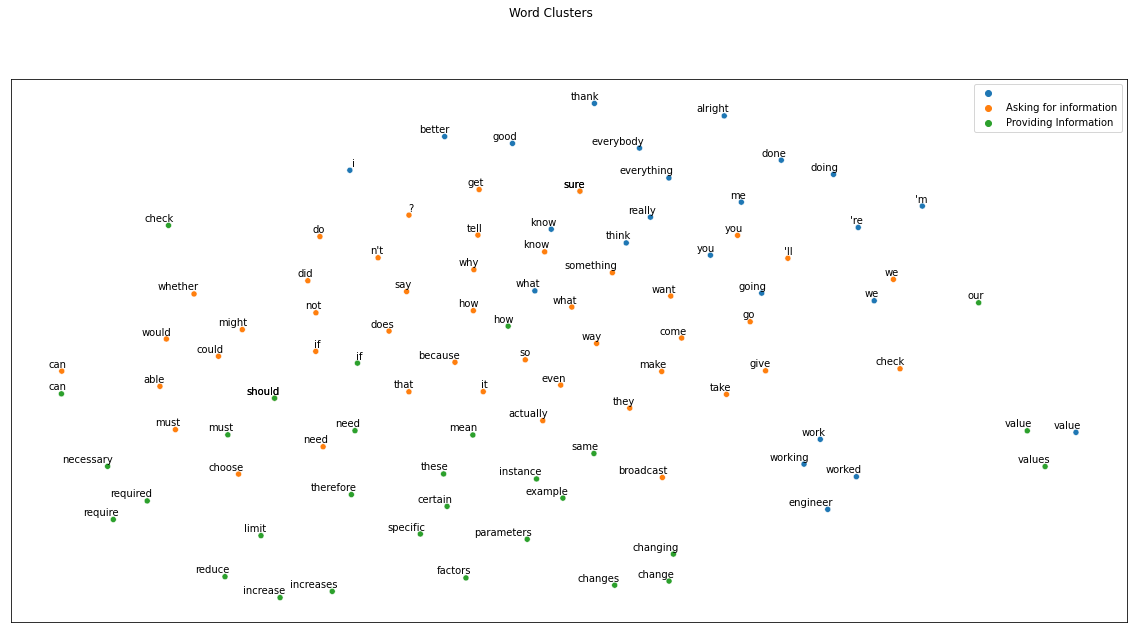

In [ ]:
plot_w2v_cluster(dic_clusters, nlp, plot_type="2d", annotate=True, figsize=(20,10))


In [ ]:
### Feature Engineering


# Load pre-trained BERT tokenizer (use a lighter veriosn: distil-BERT)
# tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
# nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# lst_vocabulary = list(tokenizer.vocab.keys())


tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:

# Create X (Unsupervised, so no need to use dtf_train)
X_test = embedding_bert(dtf_test["text_clean"], tokenizer, nlp)
X_test.shape

(148, 768)

In [ ]:
dic_y = {k:embedding_bert(v, tokenizer, nlp).mean(0) for k,v in dic_clusters.items()}
dic_y['Providing Information'].shape

(768,)

In [ ]:
predicted_prob, predicted = predict_similarity_classif(X_test, dic_y)


Accuracy: 0.23
Auc: 0.4
Detail:
                        precision    recall  f1-score   support

Asking for information       0.67      0.39      0.49        36
                   NAN       0.29      0.71      0.41        28
 Providing Information       0.00      0.00      0.00         0
 Providing information       0.00      0.00      0.00        84

              accuracy                           0.23       148
             macro avg       0.24      0.28      0.22       148
          weighted avg       0.22      0.23      0.20       148



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


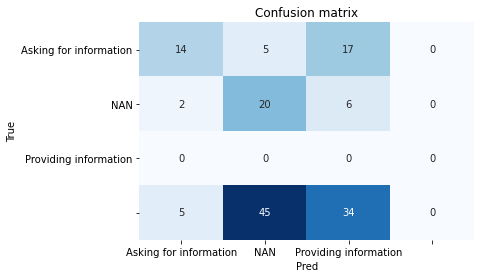

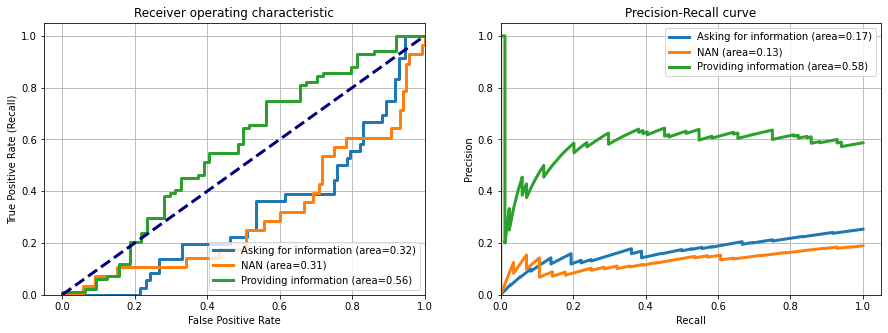

In [ ]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

True: Asking for information --> Pred: Providing Information | Similarity: 0.37
 
what's component range weights?


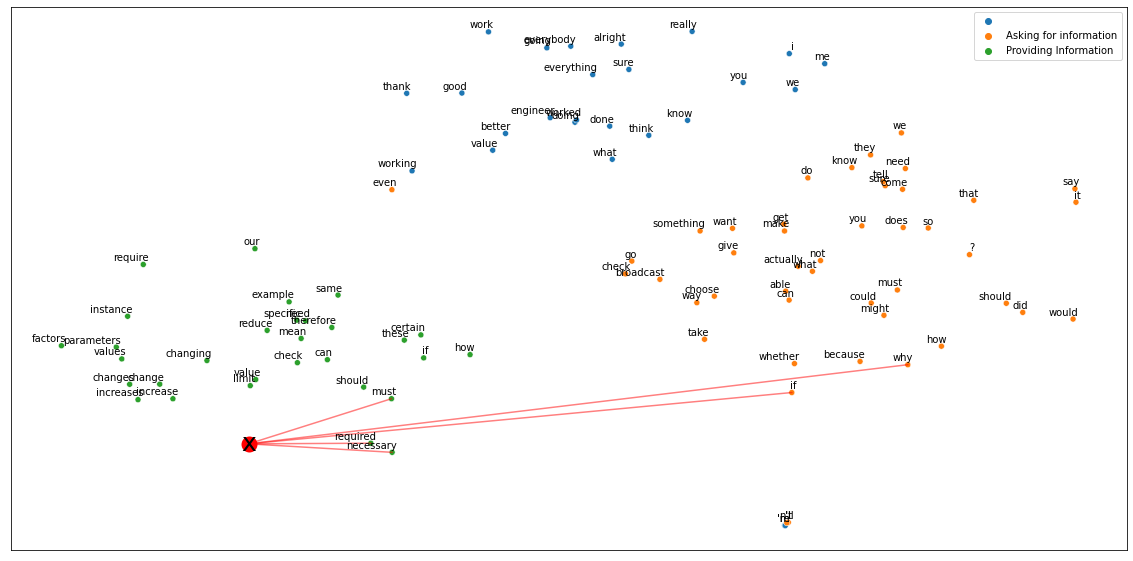

In [ ]:
i = 37
print("True:", y_test[i], "--> Pred:", predicted[i], "| Similarity:", round(np.max(predicted_prob[i]),2))
print(" ")
print(dtf_test["text_clean"].iloc[i])
explainer_similarity_classif(tokenizer, nlp, dic_clusters, dtf_test["text_clean"].iloc[i], 
                             token_level=False, top=5, figsize=(20,10))

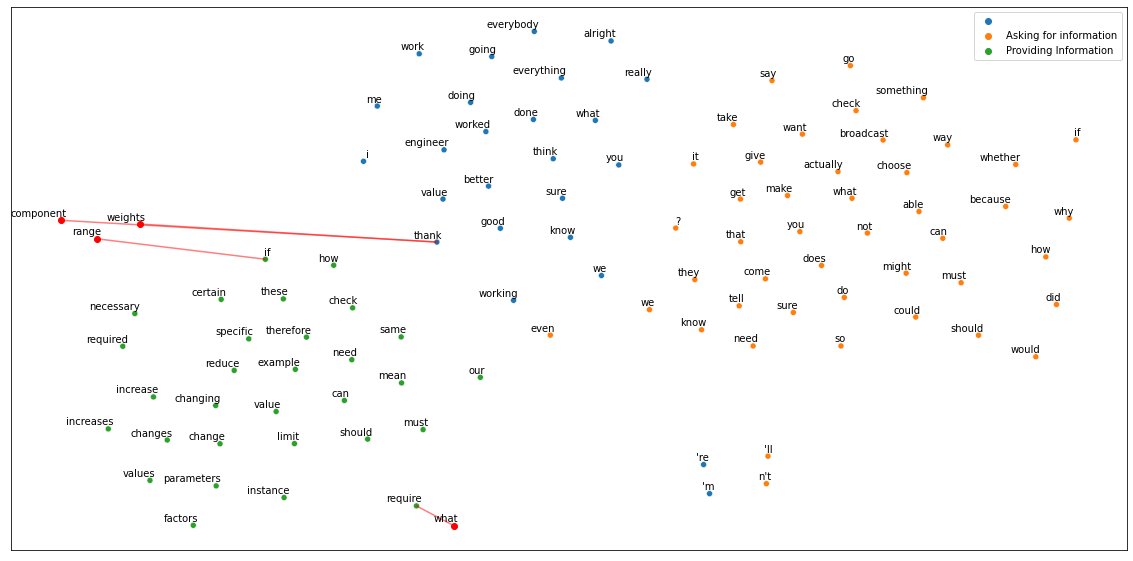

In [ ]:

explainer_similarity_classif(tokenizer, nlp, dic_clusters, dtf_test["text_clean"].iloc[i], 
                             token_level=True, top=1, figsize=(20,10))